<a href="https://colab.research.google.com/github/sks20219091/NLP_ASSIGNMENT/blob/main/NLP_ASSIGNMENT_SUMIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part of Speech tagging using HMMs

The assignment targets to implement Hidden Markov Model (HMM) to perform Part-of-Speech (PoS) tagging task

## 1. Exploring the Dataset

In [3]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# List of sentences, containing list of words, containing tuple (word, tag)
f = open('/content/sample_data/Brown_train.txt')
tmp = f.readlines()
d = []
for abc in tmp:
    wt = abc.split(" ")
    sent = []
    for wat in wt:
        try:
            if wat == "\n":
                continue
            print(wat)
            word , tag = wat.split("/")
            sent.append((word.lower(), tag))
        except:
            continue
    d.append(sent)

Streaming output truncated to the last 5000 lines.
dramatic/ADJ
edge/NOUN
and/CONJ
great/ADJ
poignancy/NOUN
./.
In/ADP
addition/NOUN
,/.
it/PRON
is/VERB
an/DET
important/ADJ
link/NOUN
in/ADP
the/DET
plot/NOUN
,/.
giving/VERB
us/PRON
a/DET
revealing/VERB
glimpse/NOUN
of/ADP
the/DET
people's/NOUN
attitude/NOUN
toward/ADP
Boris/NOUN
and/CONJ
the/DET
false/ADJ
Dimitri/NOUN
./.
The/DET
mayhem/NOUN
in/ADP
the/DET
forest/NOUN
of/ADP
Kromy/NOUN
is/VERB
a/DET
natural/ADJ
sequel/NOUN
./.
The/DET
St./NOUN
Basil's/NOUN
scene/NOUN
opens/VERB
with/ADP
little/ADJ
groups/NOUN
of/ADP
beggars/NOUN
milling/VERB
around/ADP
the/DET
square/NOUN
,/.
the/DET
ever/ADV
present/ADJ
police/NOUN
keeping/VERB
them/PRON
under/ADP
scrutiny/NOUN
./.
In/ADP
the/DET
orchestra/NOUN
we/PRON
hear/VERB
first/ADV
a/DET
hushed/VERB
,/.
hesitant/ADJ
pizzicato/NOUN
figure/NOUN
,/.
then/ADV
the/DET
insistent/ADJ
``/.
police/NOUN
''/.
motif/NOUN
as/ADP
it/PRON
appeared/VERB
in/ADP
the/DET
opening/VERB
scene/NOUN
./.
The/DET
servi

In [6]:
d[0:5]

[[('at', 'ADP'),
  ('that', 'DET'),
  ('time', 'NOUN'),
  ('highway', 'NOUN'),
  ('engineers', 'NOUN'),
  ('traveled', 'VERB'),
  ('rough', 'ADJ'),
  ('and', 'CONJ'),
  ('dirty', 'ADJ'),
  ('roads', 'NOUN'),
  ('to', 'PRT'),
  ('accomplish', 'VERB'),
  ('their', 'DET'),
  ('duties', 'NOUN'),
  ('.', '.')],
 [('using', 'VERB'),
  ('privately-owned', 'ADJ'),
  ('vehicles', 'NOUN'),
  ('was', 'VERB'),
  ('a', 'DET'),
  ('personal', 'ADJ'),
  ('hardship', 'NOUN'),
  ('for', 'ADP'),
  ('such', 'ADJ'),
  ('employees', 'NOUN'),
  (',', '.'),
  ('and', 'CONJ'),
  ('the', 'DET'),
  ('matter', 'NOUN'),
  ('of', 'ADP'),
  ('providing', 'VERB'),
  ('state', 'NOUN'),
  ('transportation', 'NOUN'),
  ('was', 'VERB'),
  ('felt', 'VERB'),
  ('perfectly', 'ADV'),
  ('justifiable', 'ADJ'),
  ('.', '.')],
 [('once', 'ADP'),
  ('the', 'DET'),
  ('principle', 'NOUN'),
  ('was', 'VERB'),
  ('established', 'VERB'),
  (',', '.'),
  ('the', 'DET'),
  ('increase', 'NOUN'),
  ('in', 'ADP'),
  ('state-owned', 'ADJ

In [10]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(d,test_size=0.1)

print(len(train_set))
print(len(test_set))
print(train_set[:5])

7038
783
[[('shipments', 'NOUN'), ('of', 'ADP'), ('arms', 'NOUN'), ('from', 'ADP'), ('western', 'ADJ'), ('countries', 'NOUN'), ('could', 'VERB'), ('similarly', 'ADV'), ('be', 'VERB'), ('seized', 'VERB'), ('as', 'ADP'), ('contraband', 'NOUN'), ('.', '.')], [('in', 'ADP'), ('general', 'ADJ'), (',', '.'), ('it', 'PRON'), ('appears', 'VERB'), ('that', 'ADP'), ('trustees', 'NOUN'), ('and', 'CONJ'), ('board', 'NOUN'), ('members', 'NOUN'), ('attempt', 'VERB'), ('to', 'PRT'), ('represent', 'VERB'), ('the', 'DET'), ('public', 'ADJ'), ('interest', 'NOUN'), ('in', 'ADP'), ('their', 'DET'), ('administration', 'NOUN'), ('of', 'ADP'), ('educational', 'ADJ'), ('policy', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('this', 'DET'), ('is', 'VERB'), ('made', 'VERB'), ('easier', 'ADJ'), ('by', 'ADP'), ('the', 'DET'), ('fact', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('dominant', 'ADJ'), ('values', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('society', 'NOUN'), ('are', 'VERB'), ('middle-class', 'NOUN'), ('values',

In [11]:
# Getting list of tagged words
ttw = [tup for sent in train_set for tup in sent]
len(ttw)

189538

In [13]:
# tkn
tkn = [pair[0] for pair in ttw]
tkn[:10]

['shipments',
 'of',
 'arms',
 'from',
 'western',
 'countries',
 'could',
 'similarly',
 'be',
 'seized']

In [15]:
# vocabulary
vocabulary_ = set(tkn)
print(len(vocabulary_))

15434


In [18]:
# number of tags
TAGS = set([pair[1] for pair in ttw])
len(TAGS)

12

In [19]:
print(TAGS)

{'CONJ', 'PRT', 'ADV', 'ADP', 'NOUN', 'DET', 'NUM', '.', 'ADJ', 'PRON', 'X', 'VERB'}


## 2. POS Tagging Algorithm - HMM



### probability of a word given a tag

In [22]:

t = len(TAGS)
v = len(vocabulary_)
w_given_t = np.zeros((t, v))

# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = ttw):
    TL = [pair for pair in train_bag if pair[1]==tag]
    ct = len(TL)
    w_given_tag_list = [pair[0] for pair in TL if pair[0]==word]
    cwgt = len(w_given_tag_list)

    return (cwgt, ct)

### Transition Probabilities (i.e. probability of getting a tag t2 given that the tag for previous word was t1)

In [23]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = ttw):
    tags = [pair[1] for pair in train_bag]
    ct1 = len([t for t in tags if t==t1])
    ct2t1 = 0
    for i in range(len(tags)-1):
        if tags[i]==t1 and tags[i+1] == t2:
            ct2t1 += 1
    return (ct2t1, ct1)

In [25]:
def start_prob(t1, train_bag=ttw):
    tags = [pair[1] for pair in train_bag]

    count_t1 = len([t for t in tags if t==t1])
    return count_t1 / len(tags)

In [30]:
start_matrix = np.zeros((len(TAGS)), dtype='float32')
for i, t1 in enumerate(list(TAGS)):
    start_matrix[i] = start_prob(t1)

In [31]:
start_matrix

array([0.03321761, 0.01973219, 0.04413363, 0.14467812, 0.25729406,
       0.1214796 , 0.01937342, 0.10764596, 0.08464793, 0.02115671,
       0.00099716, 0.14564362], dtype=float32)

In [34]:


tm = np.zeros((len(TAGS), len(TAGS)), dtype='float32')
for i, t1 in enumerate(list(TAGS)):
    for j, t2 in enumerate(list(TAGS)):
        tm[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
tm

array([[3.1766199e-04, 2.0171538e-02, 8.2274459e-02, 9.1645487e-02,
        2.9161373e-01, 1.4199492e-01, 2.9383736e-02, 2.2712834e-02,
        1.3722999e-01, 2.8907243e-02, 3.1766199e-04, 1.5343075e-01],
       [6.1497325e-03, 5.0802138e-03, 1.1497326e-02, 7.2192512e-02,
        4.8128340e-02, 6.0962565e-02, 4.2780749e-03, 3.3689838e-02,
        1.9251337e-02, 2.4064172e-03, 0.0000000e+00, 7.3636365e-01],
       [1.3030484e-02, 2.3072325e-02, 1.0041841e-01, 1.4692169e-01,
        3.2875076e-02, 7.5911537e-02, 1.9246861e-02, 1.4058578e-01,
        1.5983264e-01, 2.3789600e-02, 0.0000000e+00, 2.6431561e-01],
       [2.3703596e-03, 1.5352637e-02, 1.6628984e-02, 1.7285392e-02,
        2.6887169e-01, 4.4281963e-01, 3.7998687e-02, 8.3874259e-03,
        1.0710379e-01, 3.3257969e-02, 4.0113778e-04, 4.9522281e-02],
       [5.9486948e-02, 1.4866611e-02, 2.1941066e-02, 2.8949904e-01,
        1.4731273e-01, 1.7040212e-02, 1.6137961e-02, 2.5240430e-01,
        1.3349191e-02, 1.1421658e-02, 3.6910

In [42]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tm, columns = list(TAGS), index=list(TAGS))

In [43]:
tags_df

,CONJ,PRT,ADV,ADP,NOUN,DET,NUM,.,ADJ,PRON,X,VERB
CONJ,0.000318,0.020172,0.082274,0.091645,0.291614,0.141995,0.029384,0.022713,0.137230,0.028907,0.000318,0.153431
PRT,0.006150,0.005080,0.011497,0.072193,0.048128,0.060963,0.004278,0.033690,0.019251,0.002406,0.000000,0.736364
ADV,0.013030,0.023072,0.100418,0.146922,0.032875,0.075912,0.019247,0.140586,0.159833,0.023790,0.000000,0.264316
ADP,0.002370,0.015353,0.016629,0.017285,0.268872,0.442820,0.037999,0.008387,0.107104,0.033258,0.000401,0.049522
NOUN,0.059487,0.014867,0.021941,0.289499,0.147313,0.017040,0.016138,0.252404,0.013349,0.011422,0.000369,0.156171
DET,0.000782,0.000999,0.018806,0.010858,0.600521,0.007427,0.010380,0.010250,0.250814,0.008556,0.001390,0.079218
NUM,0.035131,0.002996,0.013889,0.119009,0.317810,0.013072,0.019880,0.375000,0.049837,0.005447,0.000000,0.047930
.,0.096554,0.022105,0.081214,0.152625,0.141793,0.190805,0.040092,0.077636,0.053325,0.061609,0.001225,0.080968
ADJ,0.037584,0.017764,0.007479,0.088257,0.683121,0.004675,0.006108,0.071803,0.064448,0.001247,0.000125,0.017390
PRON,0.007481,0.017706,0.051372,0.053367,0.003242,0.016708,0.000499,0.079302,0.015212,0.005736,0.000000,0.749377


In [44]:
tags_df.loc['.', :]

CONJ    0.096554
PRT     0.022105
ADV     0.081214
ADP     0.152625
NOUN    0.141793
DET     0.190805
NUM     0.040092
.       0.077636
ADJ     0.053325
PRON    0.061609
X       0.001225
VERB    0.080968
Name: ., dtype: float32

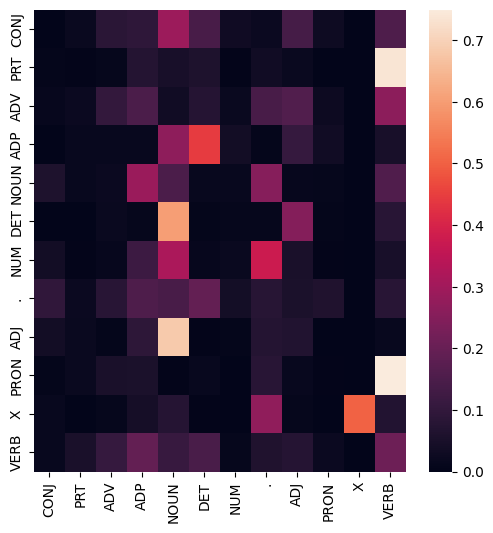

In [45]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(6, 6))
sns.heatmap(tags_df)
plt.show()


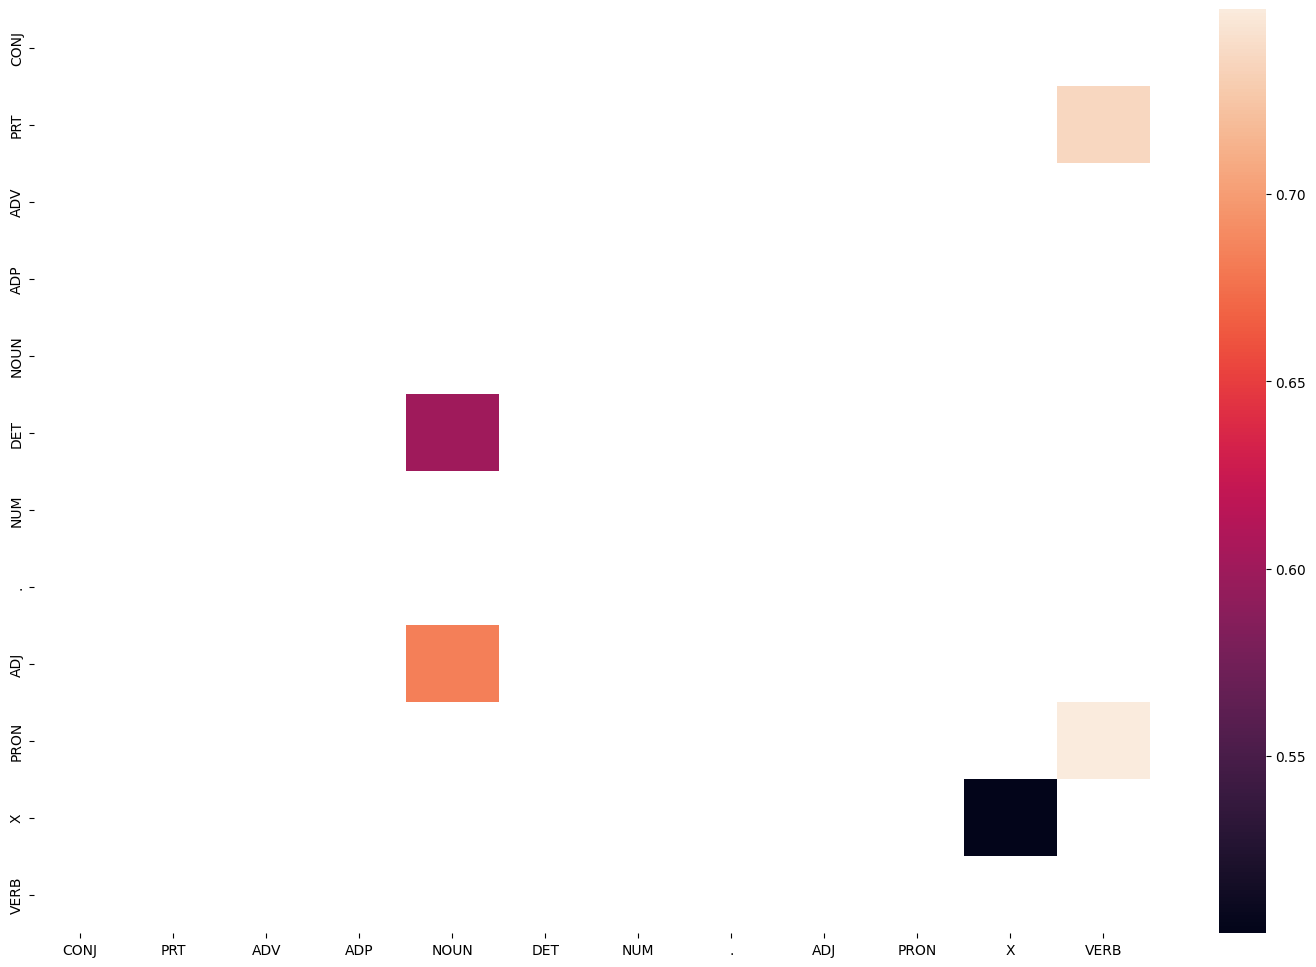

In [46]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

## 3. Viterbi Algorithm



In [48]:
len(ttw)

189538

In [52]:

def Viterbi(words, train_bag = ttw):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):

        p = []
        for t in T:
            if key == 0:
                transition_p = tags_df.loc['.', t]
            else:
                transition_p = tags_df.loc[state[-1], t]


            ep = word_given_tag(words[key], t)[0]/word_given_tag(words[key], t)[1]
            state_probability = ep * transition_p
            p.append(state_probability)

        pmax = max(p)

        s_max = T[p.index(pmax)]
        state.append(s_max)
    return list(zip(words, state))



## 4. Evaluating on Test Set

In [53]:


random.seed(1234)

# c random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

#  sents
test_run = [test_set[i] for i in rndom]

#  tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('i', 'PRON'),
  ('am', 'VERB'),
  ('told', 'VERB'),
  ('that', 'ADP'),
  ('a', 'DET'),
  ('mortar', 'NOUN'),
  ('longer', 'ADV'),
  ('slaked', 'VERB'),
  ('might', 'VERB'),
  ('have', 'VERB'),
  ('remained', 'VERB'),
  ('longer', 'ADV'),
  ('in', 'ADP'),
  ('condition', 'NOUN'),
  ('for', 'ADP'),
  ('painting', 'VERB'),
  ('.', '.')],
 [('a', 'DET'),
  ('titre', 'X'),
  ('personnel', 'X'),
  ('and', 'CONJ'),
  ('a', 'DET'),
  ('special', 'ADJ'),
  ('office', 'NOUN'),
  ('was', 'VERB'),
  ('created', 'VERB'),
  ('in', 'ADP'),
  ('the', 'DET'),
  ('ministry', 'NOUN'),
  ('of', 'ADP'),
  ('the', 'DET'),
  ('interior', 'NOUN'),
  ('to', 'PRT'),
  ('plan', 'VERB'),
  ('and', 'CONJ'),
  ('to', 'PRT'),
  ('conduct', 'VERB'),
  ('the', 'DET'),
  ('elections', 'NOUN'),
  ('.', '.')],
 [('we', 'PRON'),
  ('want', 'VERB'),
  ('to', 'PRT'),
  ('make', 'VERB'),
  ('sure', 'ADJ'),
  ('that', 'ADP'),
  ('our', 'DET'),
  ('junior', 'ADJ'),
  ('colleagues', 'NOUN'),
  ('realize', 'VERB'),
  ('that',

In [55]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [56]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  151.5265097618103
[('i', 'PRON'), ('am', 'VERB'), ('told', 'VERB'), ('that', 'ADP'), ('a', 'DET'), ('mortar', 'NOUN'), ('longer', 'ADV'), ('slaked', 'VERB'), ('might', 'VERB'), ('have', 'VERB'), ('remained', 'VERB'), ('longer', 'ADV'), ('in', 'ADP'), ('condition', 'NOUN'), ('for', 'ADP'), ('painting', 'NOUN'), ('.', '.'), ('a', 'DET'), ('titre', 'CONJ'), ('personnel', 'NOUN'), ('and', 'CONJ'), ('a', 'DET'), ('special', 'ADJ'), ('office', 'NOUN'), ('was', 'VERB'), ('created', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('ministry', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('interior', 'NOUN'), ('to', 'ADP'), ('plan', 'NOUN'), ('and', 'CONJ'), ('to', 'PRT'), ('conduct', 'VERB'), ('the', 'DET'), ('elections', 'NOUN'), ('.', '.'), ('we', 'PRON'), ('want', 'VERB'), ('to', 'PRT'), ('make', 'VERB'), ('sure', 'ADJ'), ('that', 'ADP'), ('our', 'DET'), ('junior', 'ADJ'), ('colleagues', 'NOUN'), ('realize', 'VERB'), ('that', 'ADP'), ('ideas', 'NOUN'), ('are', 'VERB'), ('welcome'

In [57]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]

In [58]:
accuracy = len(check)/len(tagged_seq)

In [59]:
accuracy

0.9457364341085271

In [60]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [61]:
incorrect_tagged_cases

[[('for', 'ADP'), (('painting', 'NOUN'), ('painting', 'VERB'))],
 [('a', 'DET'), (('titre', 'CONJ'), ('titre', 'X'))],
 [('titre', 'X'), (('personnel', 'NOUN'), ('personnel', 'X'))],
 [('interior', 'NOUN'), (('to', 'ADP'), ('to', 'PRT'))],
 [('to', 'PRT'), (('plan', 'NOUN'), ('plan', 'VERB'))],
 [('are', 'VERB'), (('welcome', 'VERB'), ('welcome', 'ADJ'))],
 [('goes', 'VERB'), (('right', 'NOUN'), ('right', 'ADV'))]]

In [62]:

s_t = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(s_t.lower())

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

In [63]:
print(tagged_seq)
print(difference)

[('twitter', 'CONJ'), ('is', 'VERB'), ('the', 'DET'), ('best', 'ADJ'), ('networking', 'CONJ'), ('social', 'ADJ'), ('site', 'NOUN'), ('.', '.'), ('man', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('social', 'ADJ'), ('animal', 'NOUN'), ('.', '.'), ('data', 'NOUN'), ('science', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('emerging', 'VERB'), ('field', 'NOUN'), ('.', '.'), ('data', 'NOUN'), ('science', 'NOUN'), ('jobs', 'NOUN'), ('are', 'VERB'), ('high', 'ADJ'), ('in', 'ADP'), ('demand', 'NOUN'), ('.', '.')]
34.21122670173645


In [65]:
def t2_given_t1_t0(t2, t1, t0, train_bag=ttw):
    tags = [pair[1] for pair in train_bag]
    count_t1_t0 = len([t for i, t in enumerate(tags) if i < len(tags) - 1 and tags[i] == t0 and tags[i+1] == t1])
    count_t2_t1_t0 = len([t for i, t in enumerate(tags) if i < len(tags) - 2 and tags[i] == t0 and tags[i+1] == t1 and tags[i+2] == t2])
    return (count_t2_t1_t0, count_t1_t0)


In [69]:
import numpy as np

def compute_transition_matrix_trigram(TAGS, train_bag=ttw):
    tags_matrix = np.zeros((len(TAGS), len(TAGS), len(TAGS)), dtype='float32')
    for i, t0 in enumerate(list(TAGS)):
        for j, t1 in enumerate(list(TAGS)):
            print(t0,t1)
            for k, t2 in enumerate(list(TAGS)):
                count_t2_t1_t0, count_t1_t0 = t2_given_t1_t0(t2, t1, t0, train_bag)
                if count_t1_t0 > 0:
                    tags_matrix[i, j, k] = count_t2_t1_t0 / count_t1_t0
    return tags_matrix


transition_matrix_trigram = compute_transition_matrix_trigram(TAGS)


CONJ CONJ
CONJ PRT
CONJ ADV
CONJ ADP
CONJ NOUN
CONJ DET
CONJ NUM
CONJ .
CONJ ADJ
CONJ PRON
CONJ X
CONJ VERB
PRT CONJ
PRT PRT
PRT ADV
PRT ADP
PRT NOUN
PRT DET
PRT NUM
PRT .
PRT ADJ
PRT PRON
PRT X
PRT VERB
ADV CONJ
ADV PRT
ADV ADV
ADV ADP
ADV NOUN
ADV DET
ADV NUM
ADV .
ADV ADJ
ADV PRON
ADV X
ADV VERB
ADP CONJ
ADP PRT
ADP ADV
ADP ADP
ADP NOUN
ADP DET
ADP NUM
ADP .
ADP ADJ
ADP PRON
ADP X
ADP VERB
NOUN CONJ
NOUN PRT
NOUN ADV
NOUN ADP
NOUN NOUN
NOUN DET
NOUN NUM
NOUN .
NOUN ADJ
NOUN PRON
NOUN X
NOUN VERB
DET CONJ
DET PRT
DET ADV
DET ADP
DET NOUN
DET DET
DET NUM
DET .
DET ADJ
DET PRON
DET X
DET VERB
NUM CONJ
NUM PRT
NUM ADV
NUM ADP
NUM NOUN
NUM DET
NUM NUM
NUM .
NUM ADJ
NUM PRON
NUM X
NUM VERB
. CONJ
. PRT
. ADV
. ADP
. NOUN
. DET
. NUM
. .
. ADJ
. PRON
. X
. VERB
ADJ CONJ
ADJ PRT
ADJ ADV
ADJ ADP
ADJ NOUN
ADJ DET
ADJ NUM
ADJ .
ADJ ADJ
ADJ PRON
ADJ X
ADJ VERB
PRON CONJ
PRON PRT
PRON ADV
PRON ADP
PRON NOUN
PRON DET
PRON NUM
PRON .
PRON ADJ
PRON PRON
PRON X
PRON VERB
X CONJ
X PRT
X ADV
X ADP
X N

In [70]:
transition_matrix_trigram

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 5.00000000e-01],
        [0.00000000e+00, 7.87401572e-03, 2.36220472e-02, ...,
         1.57480314e-02, 0.00000000e+00, 7.63779521e-01],
        [1.15830116e-02, 5.40540554e-02, 9.26640928e-02, ...,
         3.86100374e-02, 0.00000000e+00, 2.16216221e-01],
        ...,
        [0.00000000e+00, 5.49450563e-03, 4.94505502e-02, ...,
         0.00000000e+00, 0.00000000e+00, 9.17582393e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 5.00000000e-01, 5.00000000e-01],
        [1.13871638e-02, 6.93581775e-02, 1.01449274e-01, ...,
         4.96894419e-02, 0.00000000e+00, 1.10766046e-01]],

       [[0.00000000e+00, 2.60869563e-01, 8.69565234e-02, ...,
         0.00000000e+00, 0.00000000e+00, 3.91304344e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.26315793e-02, 0.00000000e+00, 6.31578922e-01],
        [2.32558139e-02, 

In [72]:
import pandas as pd

def create_transition_dataframe_trigram(transition_matrix_trigram, TAGS):
    tag_combinations = [(tag0, tag1) for tag0 in TAGS for tag1 in TAGS]
    index_labels = [f"{tag0}_{tag1}" for tag0, tag1 in tag_combinations]
    column_labels = list(TAGS)
    tags_df = pd.DataFrame(transition_matrix_trigram.reshape(-1, len(TAGS)), columns=column_labels, index=index_labels)
    return tags_df

# Example usage:
tags_df_trigram = create_transition_dataframe_trigram(transition_matrix_trigram, TAGS )


In [73]:
tags_df_trigram

,CONJ,PRT,ADV,ADP,NOUN,DET,NUM,.,ADJ,PRON,X,VERB
CONJ_CONJ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000
CONJ_PRT,0.000000,0.007874,0.023622,0.070866,0.047244,0.007874,0.007874,0.015748,0.039370,0.015748,0.000000,0.763780
CONJ_ADV,0.011583,0.054054,0.092664,0.158301,0.038610,0.129344,0.015444,0.100386,0.144788,0.038610,0.000000,0.216216
CONJ_ADP,0.000000,0.019064,0.022530,0.013865,0.195841,0.478336,0.022530,0.012132,0.123050,0.045061,0.000000,0.067591
CONJ_NOUN,0.026688,0.012527,0.020153,0.244553,0.219499,0.014706,0.007625,0.278867,0.011438,0.009259,0.001089,0.153595
...,...,...,...,...,...,...,...,...,...,...,...,...
VERB_.,0.089947,0.030570,0.102881,0.210464,0.091123,0.192828,0.015285,0.074662,0.055850,0.054086,0.001764,0.080541
VERB_ADJ,0.049510,0.089706,0.025490,0.224510,0.399510,0.007353,0.002451,0.136275,0.047549,0.002451,0.000000,0.015196
VERB_PRON,0.014196,0.075710,0.104101,0.219243,0.009464,0.052050,0.003155,0.195584,0.077287,0.001577,0.000000,0.247634
VERB_X,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000


In [75]:
def Viterbi_trigram(words, train_bag=ttw):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        print(key, word)

        p = []
        if key == 0:

            p_t = '._.'
        elif key == 1:

            p_t = state[-1]
        else:

            p_t = (state[-2], state[-1])

        for t in T:
            if key == 0:
                transition_p = tags_df_trigram.loc['._.', t]
            elif key == 1:
                prev = f"._{p_t}"
                transition_p = tags_df_trigram.loc[prev, t]
            else:
                prev = f"{p_t[0]}_{p_t[1]}"
                transition_p = tags_df_trigram.loc[prev, t]


            emission_p = word_given_tag(words[key], t)[0] / word_given_tag(words[key], t)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)

        pmax = max(p)

        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))


In [76]:
random.seed(4567)

# random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

#  sents
test_run = [test_set[i] for i in rndom]

#  tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [77]:
start = time.time()
tagged_seq = Viterbi_trigram(test_tagged_words)
end = time.time()
difference = end-start

0 laboratory
1 measurements
2 of
3 interstellar
4 radio
5 spectra
6 .
7 within
8 a
9 few
10 years
11 various
12 du
13 pont
14 manufactured
15 items
16 were
17 filling
18 the
19 entire
20 requirements
21 of
22 from
23 four
24 to
25 seven
26 of
27 general
28 motors'
29 eight
30 operating
31 divisions
32 .
33 the
34 general
35 basis
36 on
37 which
38 these
39 common
40 costs
41 are
42 assigned
43 to
44 differently
45 measured
46 units
47 of
48 service
49 will
50 be
51 illustrated
52 by
53 the
54 following
55 highly
56 simplified
57 problem
58 of
59 an
60 electric-utility
61 cost
62 analysis
63 .
64 the
65 court
66 issued
67 a
68 temporary
69 restraining
70 order
71 ,
72 directing
73 us
74 to
75 resume
76 referrals
77 .
78 we
79 want
80 to
81 make
82 sure
83 that
84 our
85 junior
86 colleagues
87 realize
88 that
89 ideas
90 are
91 welcome
92 ,
93 that
94 initiative
95 goes
96 right
97 down
98 to
99 the
100 bottom
101 and
102 goes
103 all
104 the
105 way
106 to
107 the
108 top
109 .


In [78]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  132.81631660461426
[('laboratory', 'NOUN'), ('measurements', 'NOUN'), ('of', 'ADP'), ('interstellar', 'ADJ'), ('radio', 'NOUN'), ('spectra', 'NOUN'), ('.', '.'), ('within', 'ADP'), ('a', 'DET'), ('few', 'ADJ'), ('years', 'NOUN'), ('various', 'ADJ'), ('du', 'NOUN'), ('pont', 'NOUN'), ('manufactured', 'VERB'), ('items', 'NOUN'), ('were', 'VERB'), ('filling', 'VERB'), ('the', 'DET'), ('entire', 'ADJ'), ('requirements', 'NOUN'), ('of', 'ADP'), ('from', 'ADP'), ('four', 'NUM'), ('to', 'ADP'), ('seven', 'NUM'), ('of', 'ADP'), ('general', 'ADJ'), ("motors'", 'NOUN'), ('eight', 'NUM'), ('operating', 'VERB'), ('divisions', 'NOUN'), ('.', '.'), ('the', 'DET'), ('general', 'ADJ'), ('basis', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('these', 'DET'), ('common', 'ADJ'), ('costs', 'NOUN'), ('are', 'VERB'), ('assigned', 'VERB'), ('to', 'PRT'), ('differently', 'ADV'), ('measured', 'VERB'), ('units', 'NOUN'), ('of', 'ADP'), ('service', 'NOUN'), ('will', 'VERB'), ('be', 'VERB'), 

In [79]:
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]

In [80]:
accuracy = len(check)/len(tagged_seq)

In [81]:
accuracy

0.9454545454545454

In [82]:
tags_df_trigram.loc["._."]

CONJ    0.130682
PRT     0.017677
ADV     0.059975
ADP     0.119949
NOUN    0.172980
DET     0.182449
NUM     0.082702
.       0.068813
ADJ     0.035985
PRON    0.070076
X       0.000000
VERB    0.058712
Name: ._., dtype: float32

# Implementing RNN

In [88]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed

In [90]:
def read_data(file_path):
    st = []
    tgs = []
    with open(file_path, 'r') as file:
        for l in file:
            l = l.strip().split()
            sentence = []
            tag = []
            for word_tag_pair in l:

                if len(word_tag_pair.split('/'))== 2:
                  word, tag_label = word_tag_pair.split('/')
                  sentence.append(word)
                  tag.append(tag_label)
            st.append(sentence)
            tgs.append(tag)
    return st, tgs

file_path = '/content/sample_data/Brown_train.txt'
st, tgs = read_data(file_path)

In [92]:
rnn_dataset = []
for i,j in list(zip(st,tgs)):
  temp = (" ".join(i),j)
  rnn_dataset.append(temp)

In [93]:
import tensorflow as tf
import numpy as np


EMBEDDING_DIM = 50
HIDDEN_DIM = 50
LEARNING_RATE = 0.01
NUM_EPOCHS = 5

training_data = rnn_dataset

word_to_ix = {}
tag_to_ix = {}
for sentence, tags in training_data:
    for word in sentence.split():
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
    for tag in tags:
        if tag not in tag_to_ix:
            tag_to_ix[tag] = len(tag_to_ix)


X_train = []
y_train = []
for sentence, tags in training_data:
    X_train.append([word_to_ix[word] for word in sentence.split()])
    y_train.append([tag_to_ix[tag] for tag in tags])


MAX_LEN = max(len(sentence) for sentence in X_train)
X_train = pad_sequences(X_train, maxlen=MAX_LEN, padding='post')
y_train = pad_sequences(y_train, maxlen=MAX_LEN, padding='post')

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_to_ix), EMBEDDING_DIM),
    tf.keras.layers.SimpleRNN(HIDDEN_DIM, return_sequences=True),
    tf.keras.layers.Dense(len(tag_to_ix), activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=NUM_EPOCHS)

Epoch 1/5
245/245 [==============================] - 41s 161ms/step - loss: 0.0979 - accuracy: 0.9768
Epoch 2/5
245/245 [==============================] - 38s 156ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 3/5
245/245 [==============================] - 46s 188ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 4/5
245/245 [==============================] - 40s 162ms/step - loss: 0.0030 - accuracy: 0.9990
Epoch 5/5
245/245 [==============================] - 40s 162ms/step - loss: 0.0022 - accuracy: 0.9993


In [94]:
# Example inference
st = "At that time highway engineers traveled rough and dirty roads to accomplish their duties"
isentence = [word_to_ix[word] for word in st.split()]
isentence = pad_sequences([isentence], maxlen=MAX_LEN, padding='post')
pt = model.predict(isentence)
pt = [np.argmax(tag) for tag in pt[0]]
pt = [list(tag_to_ix.keys())[list(tag_to_ix.values()).index(idx)] for idx in pt]
print("Predicted POS tags:", pt[:len(st.split())])

1/1 [==============================] - 0s 284ms/step
Predicted POS tags: ['ADP', 'ADP', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'ADJ', 'CONJ', 'ADJ', 'NOUN', 'PRT', 'VERB', 'DET', 'NOUN']
